# Find errors/warnings and optimizations with Chat GPT

by **Mathis Jeroncic**, **Université Paris-Saclay**, **IUT de Cachan**
<br> <br> 
The **aim** of this notebook is to **determine** how well *Chat GPT*  is able to **Find warnings or errors and optimisations** in the [*Valence project*](https://github.com/VALENCEML/eBOOK)'s code that we selected for the [*study*](https://github.com/MathisJeroncic/Valence_with_AI/tree/main).

In order to have a coherent experiment, every description will be generated with the same prompt : 
<br> <br> 
**Tell me if this code have errors or warning in it and try to improve it:** *Your Code*


## Data Augmentation

**I asked** to *Chat GPT* :

Tell me if this code have errors or warning in the code Data_Augmentation.py which is here: C:\Users\heloi\OneDrive\Bureau\Autooogpt\Auto-GPT-0.3.1\autogpt\auto_gpt_workspace

Is there any errors or warning in the code Data_Augmentation.py which is contained in this path : C:\Users\heloi\OneDrive\Bureau\Autooogpt\Auto-GPT-0.3.1\autogpt\auto_gpt_workspace

Is there any errors or warning in this code : https://github.com/MathisJeroncic/Valence_with_AI/blob/main/Auto-GPT/DataAugmentation.py

Is there any errors or warning in this code which is contained in this link : https://github.com/MathisJeroncic/Valence_with_AI/blob/main/Auto-GPT/DataAugmentation.py






Tell me if this code have errors or warning in it and try to improve it:

(-0.5, 1279.5, 959.5, -0.5)

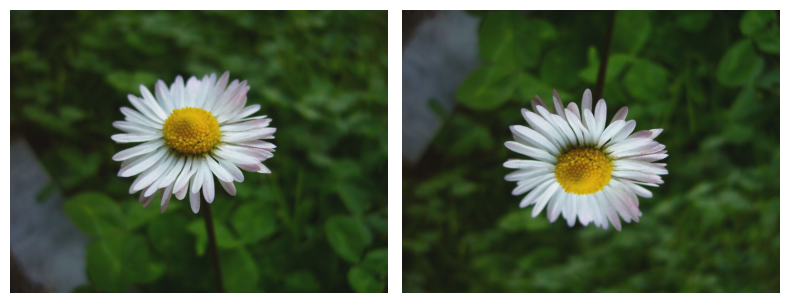

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from skimage import io 
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import util

image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')
#plt.imshow(image)
#plt.axis('off')

augmentation2=np.flipud(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation2)
plt.axis('off')

*Auto-GPT* **generated :**

The code you provided does not contain any errors or warnings. However, there are a few improvements that can be made to enhance its efficiency and readability:

    Importing specific modules: Instead of importing the entire module, you can import specific functions or classes that you need from each module. For example, instead of import matplotlib.pyplot as plt, you can use from matplotlib import pyplot as plt to only import the pyplot module.

    Reorganize imports: It's generally a good practice to group imports based on their source. In this case, you can group the scikit-image imports together and the scikit-learn imports together.

    Add exception handling for image loading: When loading an image from a URL using io.imread(), it's a good idea to wrap it in a try-except block to handle any potential exceptions that may occur during the loading process.

    Use the context manager for figure creation: Instead of creating a figure using fig=plt.figure(tight_layout='auto', figsize=(8,4)), you can use a context manager (with) to automatically handle the figure creation and ensure proper resource cleanup.

Here's the modified code with the improvements mentioned above:

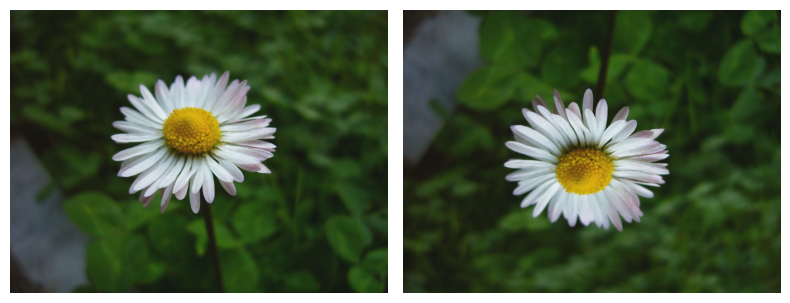

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io, transform, util, filters
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

try:
    image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')
except Exception as e:
    print("Error loading the image:", e)

# Plotting the original image and its flip
augmentation2 = np.flipud(image)

with plt.rc_context({'figure.figsize': (8, 4)}):
    fig, axes = plt.subplots(1, 2, tight_layout='auto')
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[1].imshow(augmentation2)
    axes[1].axis('off')

plt.show()


These modifications should improve the code's readability and maintainability while ensuring proper exception handling and resource management.

No Errors/Warnings detected, and it optimised the code.

## K-nearest Neighbors Algorithm (k-NN)

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

There are 150 data points. Each has 2 features.
There are 122 correctly classified samples with uniform voting.
There are 139 correctly classified samples with distance voting.


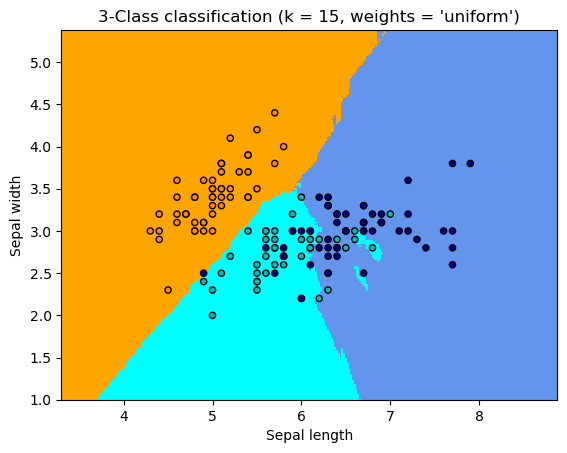

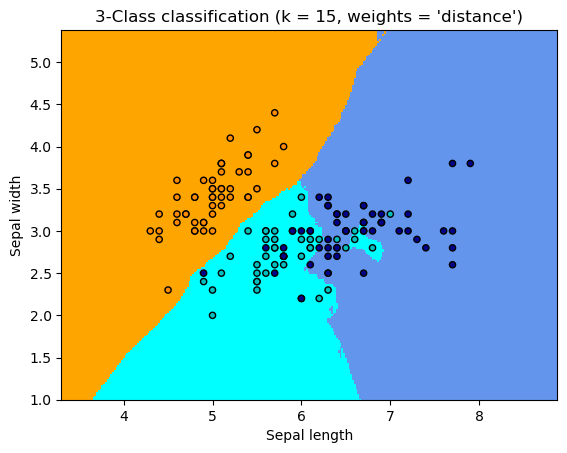

The accuracy when using uniform voting is 0.81 .

The accuracy when using distance voting is 0.93 .



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

X = iris.data[:, :2] # only take the first two features
y = iris.target
print("There are",X.shape[0],"data points. Each has",X.shape[1],"features.")

# Create color maps for the three classes:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

n_neighbors = 15 # define number of neighbors k 
acc = [] # define array to store accuriacies

for weights in ['uniform', 'distance']: # try k-NN for both uniform and distance voting
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # create a Neighbours Classifier
    clf.fit(X, y) # fit the data
    pred = clf.predict(X) # predict values for all data
    acc.append(accuracy_score(pred,y)) # compare the actual class and the predicted class for all data
    print("There are",accuracy_score(pred,y,normalize=False),"correctly classified samples with",weights,"voting.")

#### The following part is complicated but only concerns the plotting. You don't have to analyze it. ####
    # Plot the results. Assign a color to each point in the coordinate system:
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # range on the x-axis
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # range on the y-axis
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))    
   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # predict the value of each datapoint in the plot
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
#### The complicated part about plotting ends here. ####

print("The accuracy when using uniform voting is","{:.2f}".format(acc[0]),".\n")
print("The accuracy when using distance voting is","{:.2f}".format(acc[1]),".\n")

*Auto-GPT* **generated :**

The code you provided seems to be mostly correct, but there are a few improvements and potential issues to address:

    Importing Modules: The code imports the required modules at the beginning, which is good practice. However, it's missing the import statement for the matplotlib.colors module. To fix this, add the following line to the import statements:

In [ ]:
from matplotlib.colors import ListedColormap

Plotting Issue: In the line cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue']), the color 'c' is not a valid color. You should replace it with a valid color code. For example, you can replace 'c' with 'cyan'.

Evaluation of Accuracy: The accuracy calculation is currently based on predicting and evaluating the training data itself (pred = clf.predict(X)). This can lead to an overly optimistic evaluation since the model is tested on the same data it was trained on. To get a more reliable estimate of the model's performance, you should split the data into training and testing sets. You can use the train_test_split function from sklearn.model_selection to achieve this. Here's an example of how you can modify the code to include a train-test split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ...

clf.fit(X_train, y_train)  # fit the training data
pred = clf.predict(X_test)  # predict values for the test data
acc.append(accuracy_score(pred, y_test))  # compare the actual class and the predicted class for the test data


    Plotting Issue: The plotting code seems fine, but it's missing a call to plt.show() after the loop ends. This will ensure that the final plot is displayed.

With these improvements, the modified code would look like this:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data[:, :2]  # only take the first two features
y = iris.target
print("There are", X.shape[0], "data points. Each has", X.shape[1], "features.")

# Create color maps for the three classes:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'darkblue'])

n_neighbors = 15  # define the number of neighbors k
acc = []  # define an array to store accuracies

for weights in ['uniform', 'distance']:  # try k-NN for both uniform and distance voting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)  # create a Neighbours Classifier
    clf.fit(X_train, y_train)  # fit the training data
    pred = clf.predict(X_test)  # predict values for the test data
    acc.append(accuracy_score(pred, y_test))  # compare the actual class and the predicted class for the test data
    print("There are", accuracy_score(pred, y_test, normalize=False), "correctly classified samples with", weights,
          "voting.")

    # Plot the results


There are 150 data points. Each has 2 features.
There are 25 correctly classified samples with uniform voting.
There are 25 correctly classified samples with distance voting.


It detected no E/W, but with the optimisation, the code doesn't work anymore.

## Linear Regression

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

Data preview:
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
Data statistics:
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
Dataset size:  (97, 2)
X_train size:  (87,)
X_test size:  (10,)
y_train size:  (87,)
y_test size:  (10,)
Theta_0= -3.73
Theta_1= 1.17
Mean Squared Error: 10.578738743238826
For example, according to our model, a town with a population of 20,000 people would have a weekly profit of 19734.24 EUR.


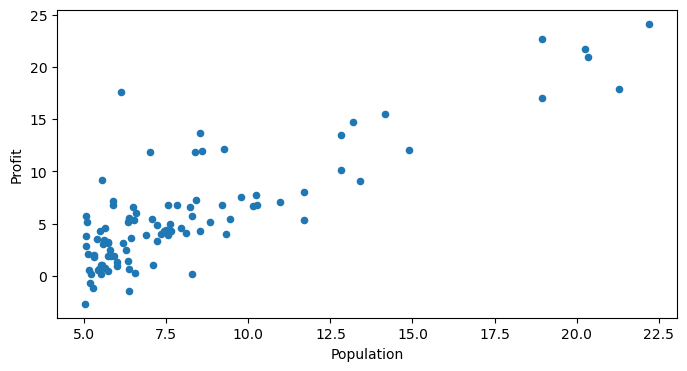

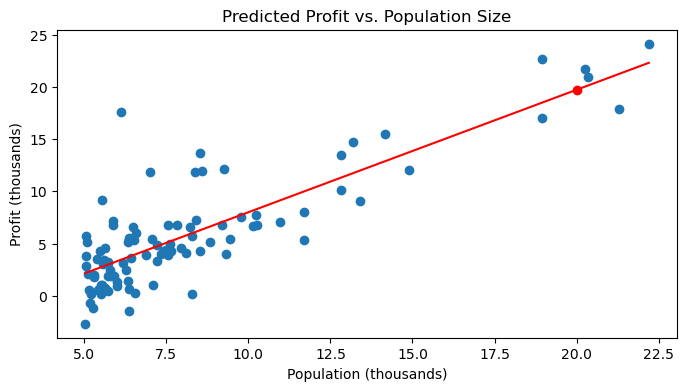

In [5]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/08/profit.txt', header=None, names=['Population', 'Profit']) # open data file
print ("Data preview:\n",data.head())
print ("Data statistics:\n",data.describe())

data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,4));   # plot the data points


X = data.iloc[:,0] # the features are contained in all rows, first column
y = data.iloc[:,1] # the values are contained in all rows, second column

# Split the data into traning and test subsets (ratio 9:1): 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=0) 
# Check the dataset and subsets dimensions: 
print('Dataset size: ', data.shape)
print('X_train size: ', X_train.shape)
print('X_test size: ', X_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

# Run the algorithm:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train) # train
# Get the coefficients: 
theta_0 = lr.intercept_ 
theta_1 = lr.coef_
print("Theta_0=","{:.2f}".format(theta_0))
print("Theta_1=","{:.2f}".format(theta_1[0]))


y_pred = lr.predict(X_test.values.reshape(-1,1)) # predict
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # evaluate 


x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_0 + theta_1 * x # this is the linear model for prediction with the parameters theta

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r') # plot the prediction line 
ax.scatter(data.Population, data.Profit) # plot the data points
ax.set_xlabel('Population (thousands)')
ax.set_ylabel('Profit (thousands)')
ax.set_title('Predicted Profit vs. Population Size')

prof = lr.predict([[20]]) # add a new town with a population of 20
print("For example, according to our model, a town with a population of 20,000 people would have a weekly profit of","{:.2f}".format(1000*prof[0]),"EUR.")
ax.scatter(20, prof, c='r'); # plot the town and it's profit value on the same figure 

*Auto-GPT* **generated :**

The code appears to be mostly correct, but there are a few improvements that can be made:

    Add import statement for requests module: Since the data is being read from a URL, you need to import the requests module to fetch the data.

    Handle missing data: Check if the dataset contains any missing values and handle them appropriately. Missing values can affect the performance of the linear regression model.

    Reshape input data: The input data X_train and X_test should be reshaped to have two dimensions (n_samples, n_features) before passing them to the fit() and predict() methods of LinearRegression.

Here's the modified code with the improvements:

Data preview:
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
Data statistics:
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
Dataset size:  (97, 2)
X_train size:  (87, 1)
X_test size:  (10, 1)
y_train size:  (87,)
y_test size:  (10,)
Theta_0 = -3.73
Theta_1 = 1.17
Mean Squared Error: 10.578738743238826
For example, according to our model, a town with a population of 20,000 people would have a weekly profit of 19.73 EUR.


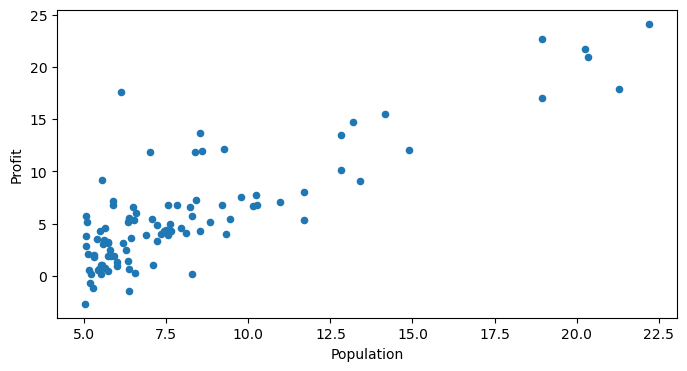

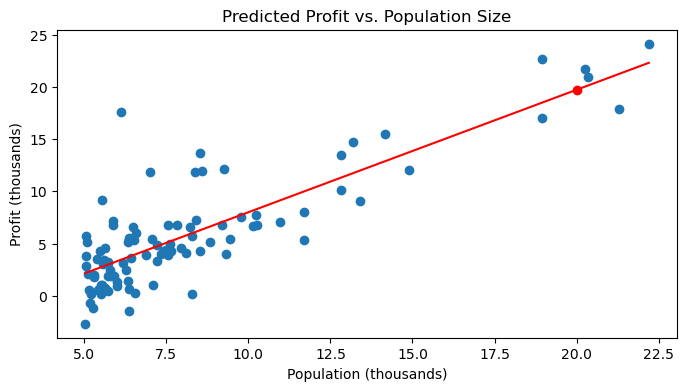

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import requests

# Fetch data from URL
url = 'https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/08/profit.txt'
response = requests.get(url)
data = pd.read_csv(url, header=None, names=['Population', 'Profit'])

# Check for missing data
if data.isnull().values.any():
    # Handle missing data appropriately
    data = data.dropna()  # Drop rows with missing values or use other techniques to handle missing data

print("Data preview:\n", data.head())
print("Data statistics:\n", data.describe())

data.plot(kind='scatter', x='Population', y='Profit', figsize=(8, 4))

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('Dataset size: ', data.shape)
print('X_train size: ', X_train.shape)
print('X_test size: ', X_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

theta_0 = lr.intercept_
theta_1 = lr.coef_
print("Theta_0 =", "{:.2f}".format(theta_0))
print("Theta_1 =", "{:.2f}".format(theta_1[0]))

y_pred = lr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_0 + theta_1 * x

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, f, 'r')
ax.scatter(data.Population, data.Profit)
ax.set_xlabel('Population (thousands)')
ax.set_ylabel('Profit (thousands)')
ax.set_title('Predicted Profit vs. Population Size')

prof = lr.predict([[20]])
print("For example, according to our model, a town with a population of 20,000 people would have a weekly profit of",
      "{:.2f}".format(prof[0]), "EUR.")
ax.scatter(20, prof, c='r')

plt.show()


Data preview:
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
Data statistics:
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
Dataset size:  (97, 2)
X_train size:  (87, 1)
X_test size:  (10, 1)
y_train size:  (87,)
y_test size:  (10,)
Theta_0 = -3.73
Theta_1 = 1.17
Mean Squared Error: 10.578738743238826
For example, according to our model, a town with a population of 20,000 people would have a weekly profit of 19.73 EUR.


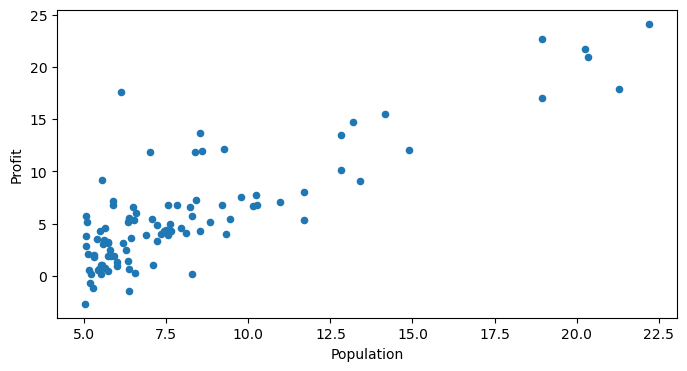

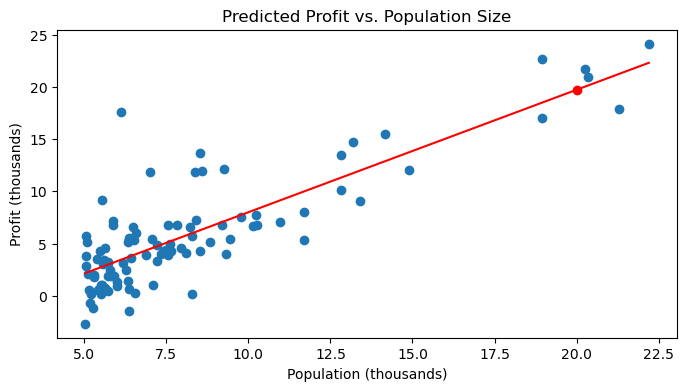

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import requests

# Fetch data from URL
url = 'https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/08/profit.txt'
response = requests.get(url)
data = pd.read_csv(url, header=None, names=['Population', 'Profit'])

# Check for missing data
if data.isnull().values.any():
    # Handle missing data appropriately
    data = data.dropna()  # Drop rows with missing values or use other techniques to handle missing data

print("Data preview:\n", data.head())
print("Data statistics:\n", data.describe())

data.plot(kind='scatter', x='Population', y='Profit', figsize=(8, 4))

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('Dataset size: ', data.shape)
print('X_train size: ', X_train.shape)
print('X_test size: ', X_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

theta_0 = lr.intercept_
theta_1 = lr.coef_
print("Theta_0 =", "{:.2f}".format(theta_0))
print("Theta_1 =", "{:.2f}".format(theta_1[0]))

y_pred = lr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_0 + theta_1 * x

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, f, 'r')
ax.scatter(data.Population, data.Profit)
ax.set_xlabel('Population (thousands)')
ax.set_ylabel('Profit (thousands)')
ax.set_title('Predicted Profit vs. Population Size')

prof = lr.predict([[20]])
print("For example, according to our model, a town with a population of 20,000 people would have a weekly profit of",
    "{:.2f}".format(prof[0]), "EUR.")
ax.scatter(20, prof, c='r')

plt.show()


These modifications should address any potential errors or warnings and improve the code's functionality.

No E/W have been detected, but optimisations have been made.

## Linear Regression with Multiple Features

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [8]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/08/prices.txt', header=None, names=['Size', 'Bedrooms', 'Price']) # open data file
print ("Data preview:\n",data.head())
print ("Data statistics:\n",data.describe())

# Standardize the features in the multiple variable regression: 
data_s = (data - data.mean() ) / data.std()
print ("Standardized data:")
print (data_s.head())
print (data_s.describe())

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_s.Size, data_s.Bedrooms, data_s.Price)  # plot the data points


X = data_s.iloc[:,:2] # the features are contained in all rows, first two columns
y = data_s.iloc[:,2] # the values are contained in all rows, third column

# Split the data into traning and test subsets (ratio 9:1): 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=1/10, random_state=0)
# Check the dataset and subsets dimensions: 
print('Dataset size: ', data.shape)
print('X_train size: ', X_train.shape)
print('X_test size: ', X_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

# Run the algorithm:
lr = LinearRegression()
lr.fit(X_train,y_train) # train
# Get the coefficients: 
theta_0 = lr.intercept_ 
theta_1 = lr.coef_[0]
theta_2 = lr.coef_[1]
print("Theta_0=","{:.2f}".format(theta_0))
print("Theta_1=","{:.2f}".format(theta_1))
print("Theta_2=","{:.2f}".format(theta_2))


y_pred = lr.predict(X_test) # predict
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # evaluate 


x12 = np.linspace(data_s.Size.min(), data_s.Size.max(), 100)
x22 = np.linspace(data_s.Bedrooms.min(), data_s.Bedrooms.max(), 100)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_s.Size, data_s.Bedrooms, data_s.Price, c='c')  # plot the data points
X12,X22 = np.meshgrid(x12,x22)

f = theta_0 + theta_1 * X12 + theta_2 * X22 # this is the linear model for prediction with the parameters theta

ax.plot_surface(X12, X22, f) # plot the prediction plane
ax.set_xlabel('Size (sq feet) - standardized')
ax.set_ylabel('Bedrooms - standardized')
ax.set_zlabel('Price [EUR] - standardized')
ax.set_title('Predicted Price vs. House Size and Number of Bedrooms')

new_house = data.iloc[-1,:] # take a new house (the last data point from the file for example: 1203 sq feet, 3 bedrooms)
new_house = (new_house - data.mean() ) / data.std() # standardize it
new_X = new_house[['Size', 'Bedrooms']] # take only the features with column names#new_X = new_house[:2] # take only the features
price = lr.predict(new_X.to_numpy().reshape(1, -1)) # predict the value of this data point 
ax.scatter(new_X[0], new_X[1], price, c='r'); # plot the house and it's price on the same figure in red

Data preview:
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
Data statistics:
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
Standardized data:
       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
               Size      Bedrooms         Price
count  4.700000e+01  4.700000e+01  4.700000e+01
mean   3.779483e-17  2.185013e-16 -7.086530e-17
std    1.000000e+00  1.000000e+00  1.000000e+00
min

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

*Auto-GPT* **generated :**

The code you provided does not have any syntax errors or warnings. However, I have a few suggestions to improve the code:

    Organize the code into functions: It would be beneficial to encapsulate related sections of code into functions. For example, you can create separate functions for loading the data, standardizing the data, training the linear regression model, and plotting the results. This improves code readability and reusability.

    Use a try-except block when loading the data: When reading data from a remote URL, it's a good practice to handle potential network errors. Wrap the pd.read_csv() line in a try-except block to catch any exceptions that might occur during the data loading process.

    Add comments for clarity: Although the code is mostly self-explanatory, adding comments at appropriate places can help readers understand the purpose and functionality of different sections of code.

Here's an improved version of the code with these suggestions implemented:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def load_data(url):
    try:
        data = pd.read_csv(url, header=None, names=['Size', 'Bedrooms', 'Price'])
        return data
    except Exception as e:
        print("Error loading data:", str(e))
        return None

def standardize_data(data):
    return (data - data.mean()) / data.std()

def train_linear_regression(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

def plot_data_and_predictions(data, X_train, y_train, lr):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(data.Size, data.Bedrooms, data.Price, c='c')
    ax.set_xlabel('Size (sq feet) - standardized')
    ax.set_ylabel('Bedrooms - standardized')
    ax.set_zlabel('Price [EUR] - standardized')
    ax.set_title('Predicted Price vs. House Size and Number of Bedrooms')

    x12 = np.linspace(data.Size.min(), data.Size.max(), 100)
    x22 = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)
    X12, X22 = np.meshgrid(x12, x22)

    theta_0 = lr.intercept_
    theta_1 = lr.coef_[0]
    theta_2 = lr.coef_[1]

    f = theta_0 + theta_1 * X12 + theta_2 * X22
    ax.plot_surface(X12, X22, f)

    plt.show()

def predict_new_house_price(new_house, lr):
    new_house_std = (new_house - new_house.mean()) / new_house.std()
    new_X = new_house_std[['Size', 'Bedrooms']]
    price = lr.predict(new_X.to_numpy().reshape(1, -1))
    return price

# Load the data
data = load_data('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/08/prices.txt')
if data is None:
    exit()

# Preview and standardize the data
print("Data preview:\n", data.head())
print("Data statistics:\n", data.describe())

data_s = standardize_data(data)
print("Standardized data:")
print(data_s.head())
print(data_s.describe())

# Split the data into training and test subsets
X = data_s.iloc[:, :2]
y = data_s.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X.values,


SyntaxError: incomplete input (2061709137.py, line 70)

No E/W detected, but the optimisation doesn't work.

## KMeans Clustering

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [7]:
# Import the necessary libraries and modules:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)



X, y = datsets['blobs'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=5,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
#plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');


NameError: name 'datsets' is not defined

*Auto-GPT* **generated :**

The code you provided has a few errors and typos. Here's the corrected version with improvements:

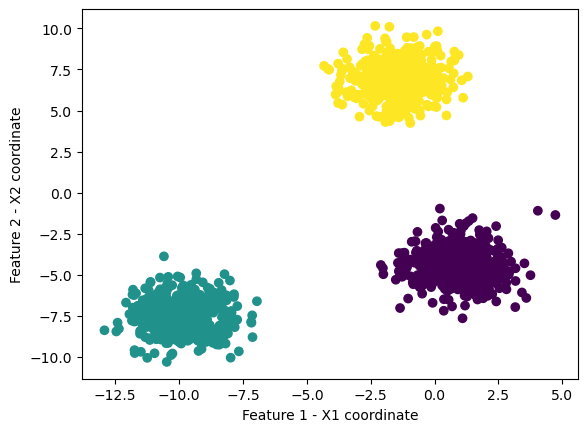

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

n_samples = 1500  # number of data points
random_state = 100  # seed number for data points generation

# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

X, y = blobs  # retrieve data

scaler = StandardScaler()  # standardize data
X_scaled = scaler.fit_transform(X)  # apply scaling to X

kmeans = KMeans(n_clusters=3, init='random', n_init=5, max_iter=20, random_state=random_state)  # initialize algorithm
y_pred = kmeans.fit_predict(X_scaled)  # run algorithm

# plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate')
plt.show()


Improvements made:

    Fixed the typo in datasets (changed datsets to datasets).
    Assigned blobs to X and y correctly (X, y = blobs instead of X, y = datsets['blobs']).
    Created X_scaled to store the scaled data using StandardScaler.
    Added random_state=random_state to ensure reproducibility when generating blobs and initializing KMeans.
    Added plt.show() to display the plot.

With these corrections, the code should run without errors or warnings and display the scatter plot correctly.

The code didn't work, and it detected the mistake. The code was corrected, and now it works.

## DBSCAN

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN 

n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate concentrical circles:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05) 

# Plot the generated datasets:
datsets2 = {'circles': noisy_circles,'crescents': noisy_moons}
plot_nr = 1
plt.figure(figsize=(20, 5))

plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    dbscan = DBSCAN(eps=0.3,min_samples=10) # initialize algorithm
    y_pred = dbscan.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

*Auto-GPT* **generated :**

The code you provided does not have any syntax errors, but there are a few improvements that can be made. Here's an updated version of the code:

<Figure size 2000x500 with 0 Axes>

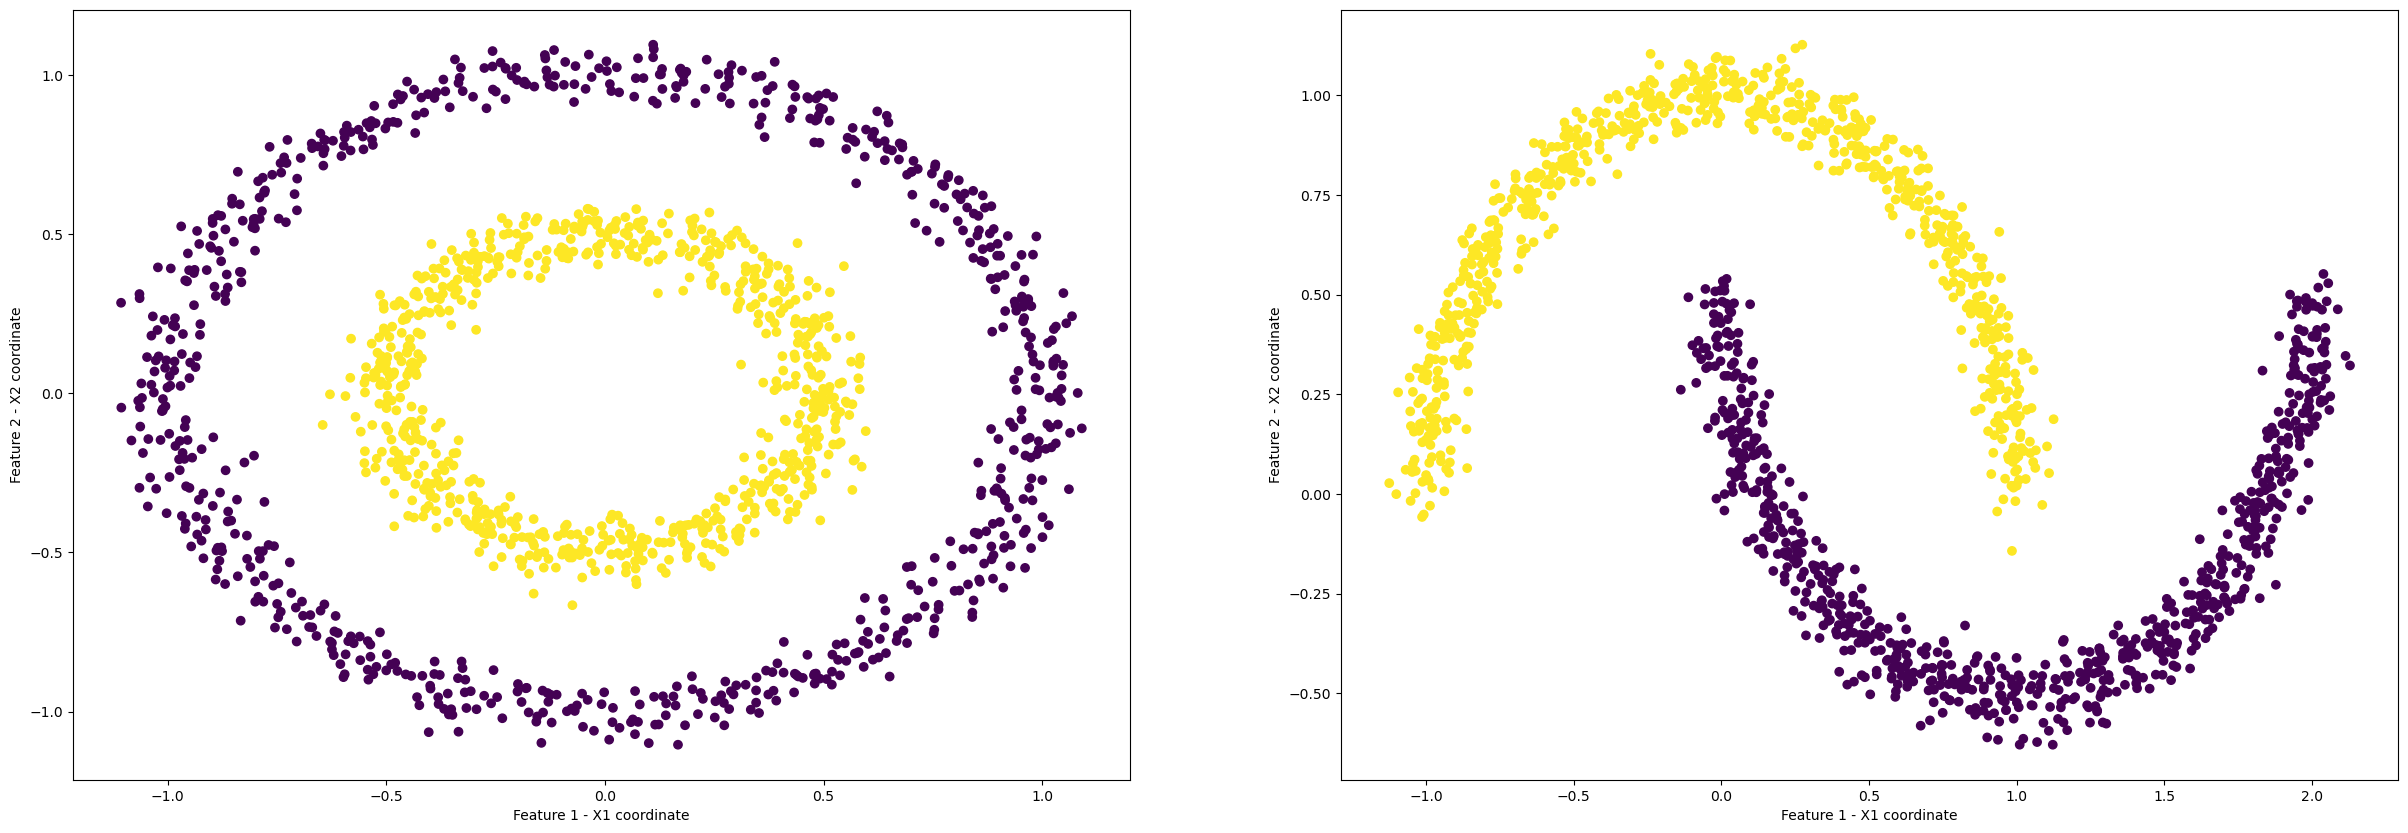

<Figure size 2000x500 with 0 Axes>

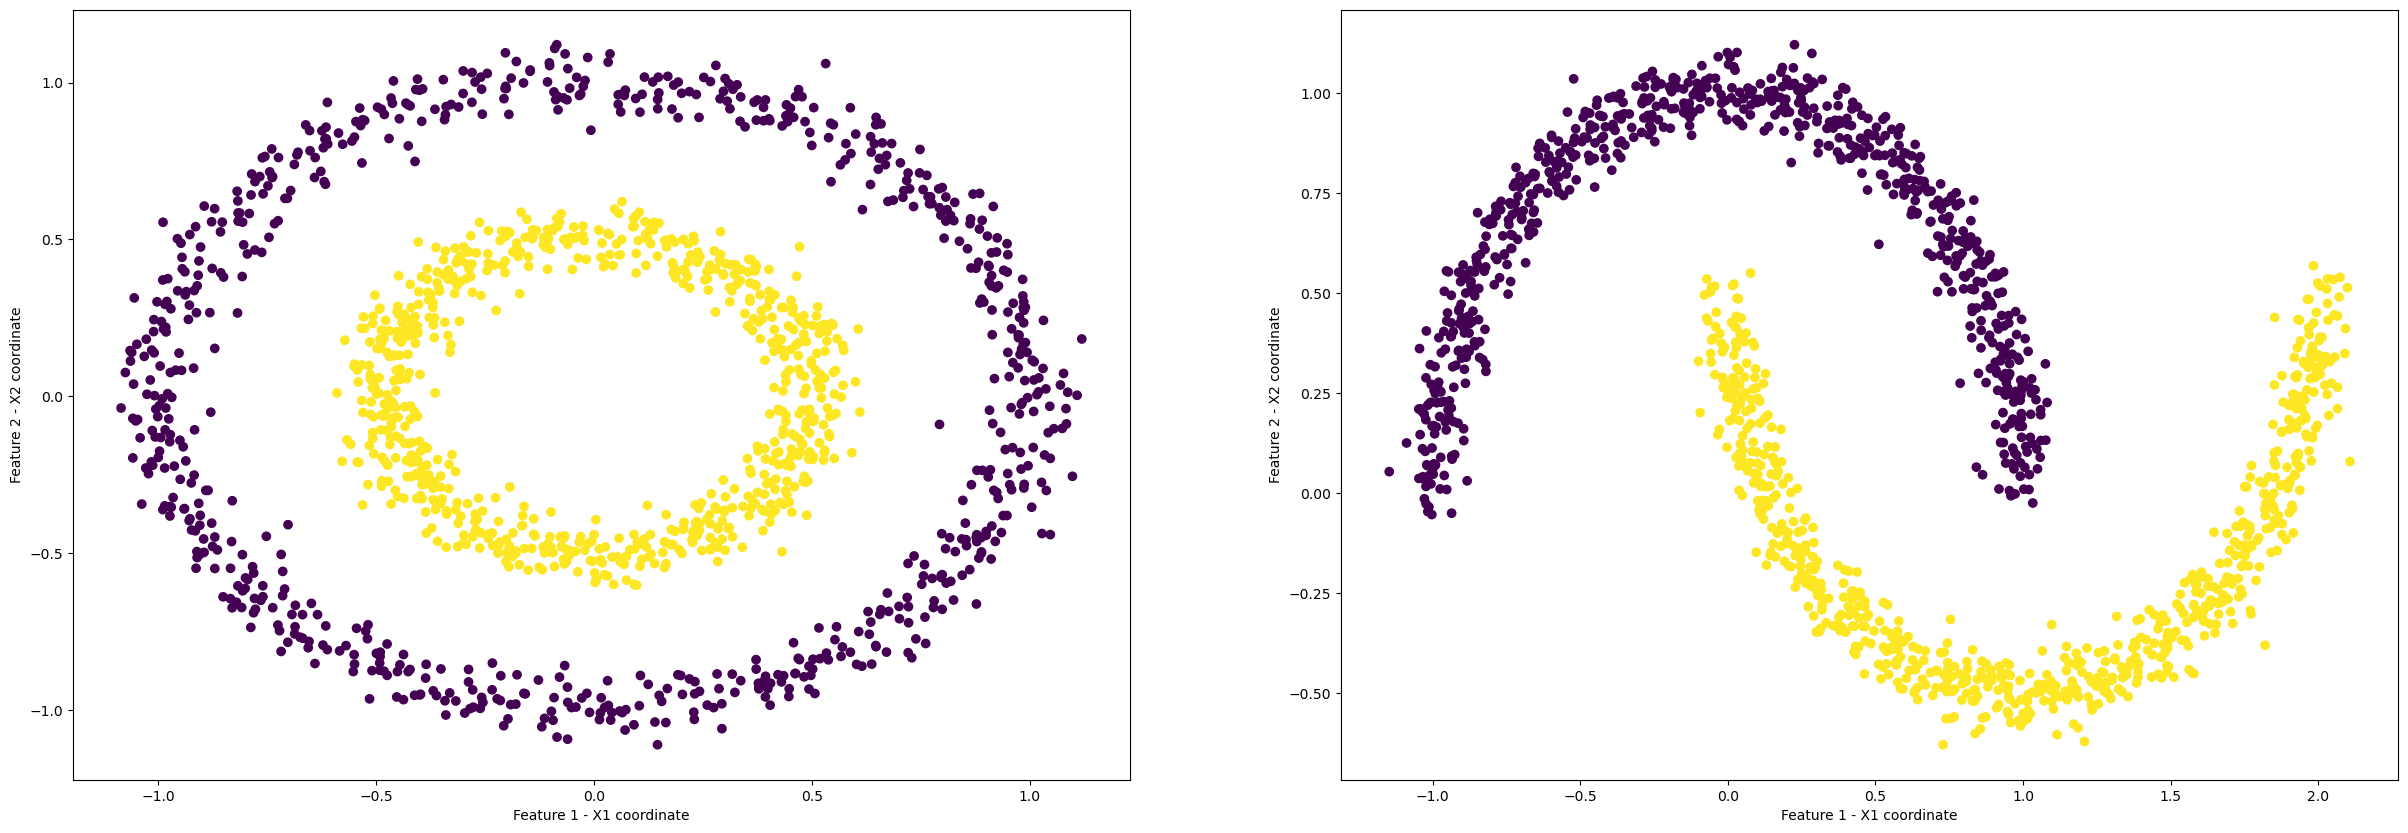

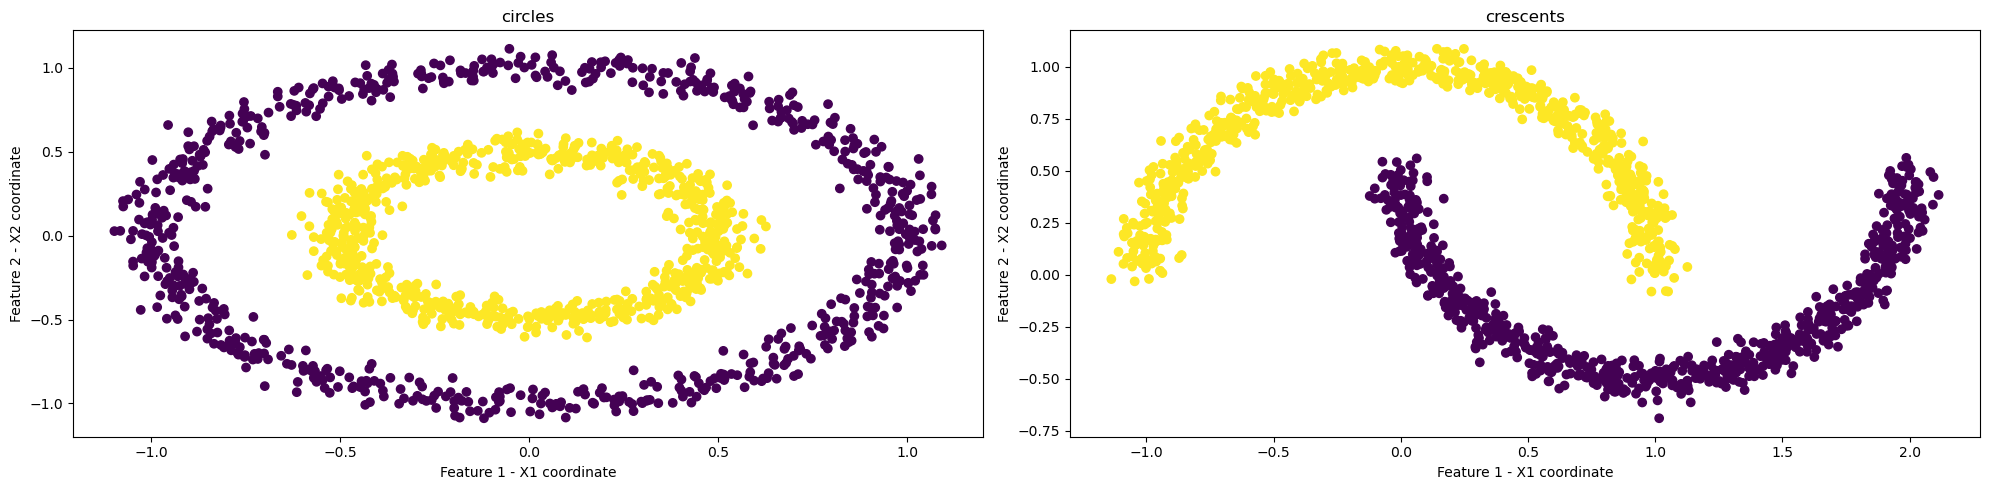

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

n_samples = 1500  # number of data points
random_state = 100  # seed number for data points generation

# Generate concentric circles:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Plot the generated datasets:
datasets = {'circles': noisy_circles, 'crescents': noisy_moons}
plt.figure(figsize=(20, 5))

for i, (key, data) in enumerate(datasets.items()):
    X, y = data

    scaler = StandardScaler()  # standardize data
    X_scaled = scaler.fit_transform(X)

    dbscan = DBSCAN(eps=0.3, min_samples=10)  # initialize algorithm
    y_pred = dbscan.fit_predict(X_scaled)  # run algorithm

    plt.subplot(1, len(datasets), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plt.title(key)

plt.tight_layout()
plt.show()


Improvements made:

    Renamed datsets2 to datasets for clarity.
    Used tuple unpacking to retrieve key and data in the loop.
    Created a separate variable X_scaled to store the scaled data for better readability.
    Added a title to each subplot indicating the dataset being plotted.
    Added plt.tight_layout() to improve the spacing between subplots.
    Removed the unnecessary line plt.figure(figsize=(30, 10)) as it creates an empty figure that is not used.

These improvements should make the code clearer and more organized while producing the desired plots.

No E/W, but several optimisations, and 3 tries displayed instead of one but it works. 

## KMeans for color quantization

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

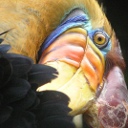

ValueError: cannot reshape array of size 3000 into shape (128,128,3)

In [14]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

display(Image(filename='bird_small.png')) # show picture
image_data = loadmat('bird_small.mat') # load RGB values of the pixels of the picture
A = image_data['A']

"""
print ("Original pixel RGB values:\n",A)

A = A / 255. # normalize value ranges
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # reshape the array

print ("Number of pixels (rows):",np.size(X,axis=0))
print ("Number of colors (columns) ",np.size(X,axis=1))
print ("Data:\n",X)
"""

n_clusters = 16 # define number of clusters

# Run the algorithm:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5) 
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate and show the new image: 
X_recovered = kmeans.cluster_centers_[y_pred] 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered);

*Auto-GPT* **generated :**

The code you provided seems to be incomplete and has commented out sections. However, I can still analyze the existing code and suggest improvements. Here's the improved code:

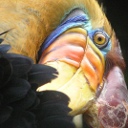

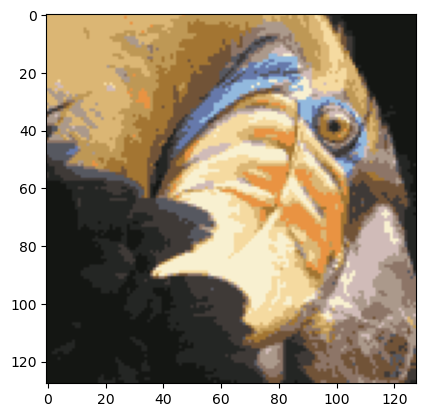

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

# Load and display the image
display(Image(filename='bird_small.png'))

# Load RGB values of the pixels of the picture
image_data = loadmat('bird_small.mat')
A = image_data['A']

# Normalize the RGB values
A = A / 255.

# Reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

n_clusters = 16  # Define the number of clusters

# Run the K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5)
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate the image
X_recovered = kmeans.cluster_centers_[y_pred]
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

# Display the new image
plt.imshow(X_recovered)
plt.show()


Improvements:

    Removed commented-out code: The commented-out code doesn't contribute to the execution and can be removed to improve readability.
    Added missing import statements: You need to import the necessary libraries before using them. I added the missing import statements for numpy, matplotlib, sklearn.cluster, scipy.io, and IPython.display.
    Fixed indentation: The code block from loading the image to displaying the new image should be at the same indentation level.

Please make sure to provide the complete code and specify any specific issues or requirements if you need further assistance.

The error has been detected, then corrected, and the code has been optimised.

## Implementation of an Artificial Neuron

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [1]:
import numpy as np

class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

neuron = Neuron([1, 1], -1)
print(neuron.weights, neuron.bias)

xs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    ])
for x in xs:
    print(x, "->", neuron(x))

[1, 1] -1
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


*Auto-GPT* **generated :**

The code you provided does not have any syntax errors, but there are a few improvements that can be made to enhance its readability and functionality. Here's an improved version of the code:

In [18]:
import numpy as np

class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = np.array(weights)
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.dot(self.weights, x) + self.bias
        y = 1 if a > 0 else 0
        return y

neuron = Neuron([1, 1], -1)
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)

xs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
for x in xs:
    print(x, "->", neuron(x))


Weights: [1 1]
Bias: -1
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


Improvements made:

    Converted the weights list to a NumPy array to ensure consistency and compatibility with array operations.
    Used np.dot to perform the dot product between the weights and input x, instead of explicitly summing the element-wise multiplication.
    Added print statements to clarify the output and separate the weights and bias information.
    Removed unnecessary parentheses and whitespace for improved readability.
    Aligned the closing square bracket of xs array with the opening square bracket for better formatting.

These improvements enhance the code's clarity and maintainability, while preserving its functionality.

No E/W, but the code has been optimised.

## Training a neuron

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [42]:
import numpy as np

class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    
    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y
    
neuron = Neuron([1, 1], -1)

xs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    ])
    
np.random.seed(42)
neuron = Neuron(n_inputs=2)
print(neuron.weights, neuron.bias)

for x in xs:
    print(x, "->", neuron(x))

[ 0.49671415 -0.1382643 ] 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


*Auto-GPT* **generated :**

The code you provided appears to be correct and does not contain any errors or warnings. However, there are a few improvements that can be made:

    Import Statements: It's good practice to place import statements at the beginning of your code, so you should move import numpy as np to the top of the code.

    Variable Names: In the __init__ method of the Neuron class, the parameter n_inputs can be renamed to input_size for clarity.

    Type Hinting: Adding type hints to your code can improve its readability and make it easier to understand. You can specify the types of the parameters and return values in the function signatures. For example, def __init__(self, weights: Optional[List[float]] = None, bias: Optional[float] = None, input_size: Optional[int] = None) -> None:

    Random Initialization: Instead of using np.random.normal() to initialize the weights and bias, you can use np.random.randn() which simplifies the code.

Here's the improved version of the code with the suggested changes:

In [19]:
import numpy as np
from typing import List, Optional

class Neuron:
    def __init__(self, weights: Optional[List[float]] = None, bias: Optional[float] = None, input_size: Optional[int] = None) -> None:
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.randn(input_size)
            self.bias = np.random.randn()

    def __call__(self, x: np.ndarray) -> int:
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

neuron = Neuron([1, 1], -1)

xs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

np.random.seed(42)
neuron = Neuron(input_size=2)
print(neuron.weights, neuron.bias)

for x in xs:
    print(x, "->", neuron(x))


[ 0.49671415 -0.1382643 ] 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


These changes enhance code readability and adhere to best practices.

No E/W and the code has been optimised.

## Implementing neuron training

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [20]:
class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

    def backprop(self, loss, x):
        # loss = y - y_pred = y - (sum(w * x) + b)
        self.grad_weights = - loss * x
        self.grad_bias = - loss

    def update(self):
        self.weights = self.weights - self.grad_weights * self.learn_rate
        self.bias = self.bias - self.grad_bias * self.learn_rate

    def fit(self, xs, ys, epochs=20, learn_rate=0.1, verbose=True):
        self.learn_rate = learn_rate
        for epoch in range(epochs):
            if verbose:
                print(f"{epoch + 1}/{epochs} loss = ", end="")
            epoch_loss = 0
            for x, y in zip(xs, ys):
                y_pred = self(x)
                loss = y - y_pred
                self.backprop(loss, x)
                self.update()
                epoch_loss += loss
            if verbose:
                print(epoch_loss / x.shape[0])

np.random.seed(42)
neuron = Neuron(n_inputs=2)
print(neuron.weights, neuron.bias)
for x in xs:
    print(x, "->", neuron(x))

ys = np.array([0, 0, 0, 1])  # AND

neuron.fit(xs, ys)

print(neuron.weights, neuron.bias)
for x in xs:
    print(x, "->", neuron(x))

[ 0.49671415 -0.1382643 ] 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1
1/20 loss = -1.5
2/20 loss = -1.5
3/20 loss = -0.5
4/20 loss = 0.0
5/20 loss = 0.0
6/20 loss = -0.5
7/20 loss = 0.0
8/20 loss = 0.0
9/20 loss = -0.5
10/20 loss = 0.0
11/20 loss = 0.0
12/20 loss = 0.0
13/20 loss = 0.0
14/20 loss = 0.0
15/20 loss = 0.0
16/20 loss = 0.0
17/20 loss = 0.0
18/20 loss = 0.0
19/20 loss = 0.0
20/20 loss = 0.0
[0.19671415 0.0617357 ] -0.2523114618993075
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


*Auto-GPT* **generated :**

The code you provided seems to have a few errors and missing imports. Here's an improved version of the code with the necessary fixes:

In [21]:
import numpy as np

class Neuron:
    def __init__(self, weights=None, bias=None, n_inputs=None):
        if weights is not None:
            self.weights = weights
            self.bias = bias
        else:
            self.weights = np.random.normal(size=n_inputs)
            self.bias = np.random.normal()

    def __call__(self, x):
        a = np.sum(self.weights * x) + self.bias
        y = 1 if a > 0 else 0
        return y

    def backprop(self, loss, x):
        self.grad_weights = - loss * x
        self.grad_bias = - loss

    def update(self):
        self.weights = self.weights - self.grad_weights * self.learn_rate
        self.bias = self.bias - self.grad_bias * self.learn_rate

    def fit(self, xs, ys, epochs=20, learn_rate=0.1, verbose=True):
        self.learn_rate = learn_rate
        for epoch in range(epochs):
            if verbose:
                print(f"{epoch + 1}/{epochs} loss = ", end="")
            epoch_loss = 0
            for x, y in zip(xs, ys):
                y_pred = self(x)
                loss = y - y_pred
                self.backprop(loss, x)
                self.update()
                epoch_loss += loss
            if verbose:
                print(epoch_loss / len(xs))

np.random.seed(42)

# Define input data
xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
ys = np.array([0, 0, 0, 1])  # AND

# Create and train the neuron
neuron = Neuron(n_inputs=2)
print("Initial weights:", neuron.weights)
print("Initial bias:", neuron.bias)

for x in xs:
    print(x, "->", neuron(x))

neuron.fit(xs, ys)

print("Trained weights:", neuron.weights)
print("Trained bias:", neuron.bias)

for x in xs:
    print(x, "->", neuron(x))


Initial weights: [ 0.49671415 -0.1382643 ]
Initial bias: 0.6476885381006925
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1
1/20 loss = -0.75
2/20 loss = -0.75
3/20 loss = -0.25
4/20 loss = 0.0
5/20 loss = 0.0
6/20 loss = -0.25
7/20 loss = 0.0
8/20 loss = 0.0
9/20 loss = -0.25
10/20 loss = 0.0
11/20 loss = 0.0
12/20 loss = 0.0
13/20 loss = 0.0
14/20 loss = 0.0
15/20 loss = 0.0
16/20 loss = 0.0
17/20 loss = 0.0
18/20 loss = 0.0
19/20 loss = 0.0
20/20 loss = 0.0
Trained weights: [0.19671415 0.0617357 ]
Trained bias: -0.2523114618993075
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


Improvements made:

    Imported the numpy module at the beginning.
    Corrected the indentation and added missing variable xs to define the input data.
    Fixed the loop for printing the inputs and outputs.
    Changed x.shape[0] to len(xs) in the fit method to calculate the average loss correctly.
    Added more informative print statements for initial and trained weights and biases.

Now the code should run without errors or warnings, and it should train the neuron using the input data and print the expected outputs.

It detected an error even without any error, so it's not good. However, it well optimised the code.

## Regression with a Shallow Neural Network

**I asked** to *Auto-GPT* :

Tell me if this code have errors or warning in it and try to improve it:

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neural_network
xs = np.linspace(0, 2 * np.pi, 10)
np.random.seed(42)
ys = np.sin(xs) + np.random.normal(size=xs.size) * 0.2
x_axis = np.linspace(-.1, 2 * np.pi + .1, 100)
y_sin = np.sin(x_axis)

xs = np.expand_dims(xs, 1)
x_axis = np.expand_dims(x_axis, 1)

##show the resulting training set and the sine function
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()

##initialize the neural network
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate_init=0.01,
    max_iter=50,
    tol=1e-4,
    early_stopping=False,
    random_state=42,
    verbose=True,    
    )
##train the network
reg.fit(xs, ys)

##predict values for the learned function
y_pred_under = reg.predict(x_axis)
##show result
plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under)
plt.grid()
plt.tight_layout()

Iteration 1, loss = 1.79730213
Iteration 2, loss = 1.69205954
Iteration 3, loss = 1.59169986
Iteration 4, loss = 1.49621502
Iteration 5, loss = 1.40556850
Iteration 6, loss = 1.31969700
Iteration 7, loss = 1.23851098
Iteration 8, loss = 1.16189426
Iteration 9, loss = 1.08970298
Iteration 10, loss = 1.02176477
Iteration 11, loss = 0.95787993
Iteration 12, loss = 0.89782678
Iteration 13, loss = 0.84137310
Iteration 14, loss = 0.78829203
Iteration 15, loss = 0.73837773
Iteration 16, loss = 0.69145581
Iteration 17, loss = 0.64738671
Iteration 18, loss = 0.60606433
Iteration 19, loss = 0.56741246
Iteration 20, loss = 0.53138080
Iteration 21, loss = 0.49794070
Iteration 22, loss = 0.46707996
Iteration 23, loss = 0.43879543
Iteration 24, loss = 0.41308237
Iteration 25, loss = 0.38992005
Iteration 26, loss = 0.36925447
Iteration 27, loss = 0.35098048
Iteration 28, loss = 0.33492811
Iteration 29, loss = 0.32085881
Iteration 30, loss = 0.30847557
Iteration 31, loss = 0.29744608
Iteration 32, los

C:\Users\heloi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


*Auto-GPT* **generated :**

The code you provided appears to be mostly correct. However, there are a few improvements and potential issues to address. Here's an improved version of the code:

Iteration 1, loss = 1.79730213
Iteration 2, loss = 1.69205954
Iteration 3, loss = 1.59169986
Iteration 4, loss = 1.49621502
Iteration 5, loss = 1.40556850
Iteration 6, loss = 1.31969700
Iteration 7, loss = 1.23851098
Iteration 8, loss = 1.16189426
Iteration 9, loss = 1.08970298
Iteration 10, loss = 1.02176477
Iteration 11, loss = 0.95787993
Iteration 12, loss = 0.89782678
Iteration 13, loss = 0.84137310
Iteration 14, loss = 0.78829203
Iteration 15, loss = 0.73837773
Iteration 16, loss = 0.69145581
Iteration 17, loss = 0.64738671
Iteration 18, loss = 0.60606433
Iteration 19, loss = 0.56741246
Iteration 20, loss = 0.53138080
Iteration 21, loss = 0.49794070
Iteration 22, loss = 0.46707996
Iteration 23, loss = 0.43879543
Iteration 24, loss = 0.41308237
Iteration 25, loss = 0.38992005
Iteration 26, loss = 0.36925447
Iteration 27, loss = 0.35098048
Iteration 28, loss = 0.33492811
Iteration 29, loss = 0.32085881
Iteration 30, loss = 0.30847557
Iteration 31, loss = 0.29744608
Iteration 32, los

C:\Users\heloi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


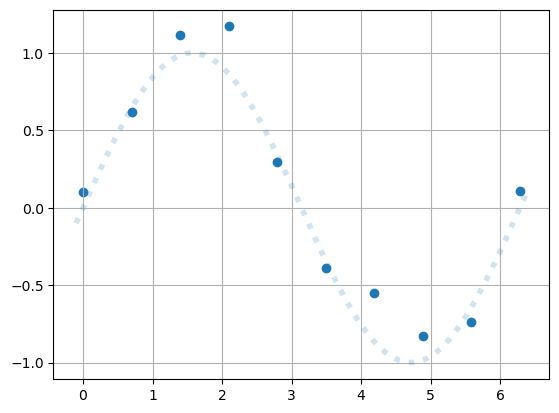

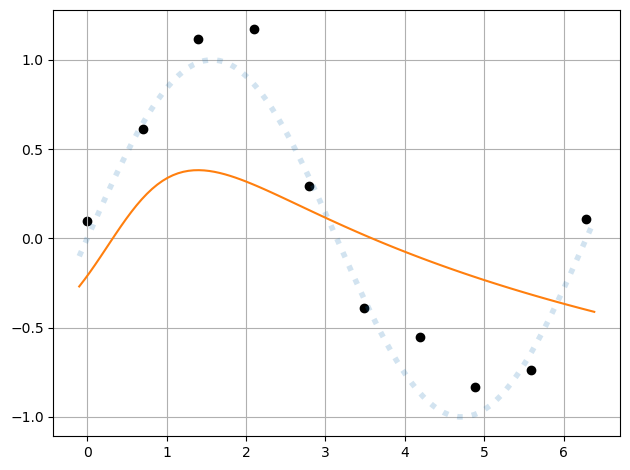

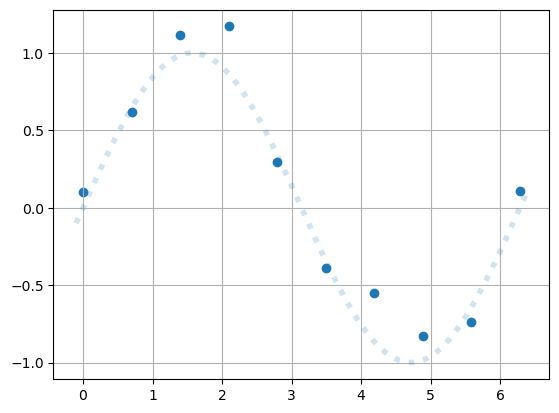

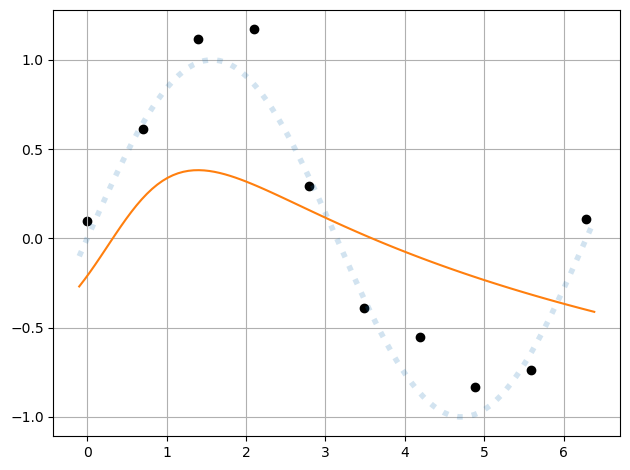

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(42)

# Generate training data
xs = np.linspace(0, 2 * np.pi, 10)
ys = np.sin(xs) + np.random.normal(size=xs.size) * 0.2

# Generate test data
x_axis = np.linspace(-0.1, 2 * np.pi + 0.1, 100)
y_sin = np.sin(x_axis)

# Reshape input arrays to have the expected dimensions
xs = xs.reshape(-1, 1)
x_axis = x_axis.reshape(-1, 1)

# Show the resulting training set and the sine function
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()

# Initialize the neural network
reg = MLPRegressor(
    hidden_layer_sizes=(5,),
    activation="tanh",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate_init=0.01,
    max_iter=50,
    tol=1e-4,
    early_stopping=False,
    random_state=42,
    verbose=True
)

# Train the network
reg.fit(xs, ys)

# Predict values for the learned function
y_pred_under = reg.predict(x_axis)

# Show the result
plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under)
plt.grid()
plt.tight_layout()
plt.show()


Improvements made:

    The import statement for neural_network was modified to from sklearn.neural_network import MLPRegressor for clarity.
    The np.expand_dims calls were replaced with the reshape method to reshape the input arrays.
    The hidden layer sizes were changed from hidden_layer_sizes=(5) to hidden_layer_sizes=(5,) to ensure a tuple is passed as expected by MLPRegressor.
    The plt.tight_layout() call was added to improve the layout of the plots.

Overall, the code should now execute correctly without any errors or warnings, and it follows some best practices for formatting and readability.

It didn't detected the error, but fix it while it optimised the code.

## Conclusion: